### Description:  This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
###                to predict the closing stock price of a corporation (MSFT) using the past stock price.

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
df = pd.read_csv('MSFT.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
1986-03-14,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
1986-03-17,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
1986-03-18,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
1986-03-19,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
1986-03-20,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059891,58435200
...,...,...,...,...,...,...,...
2022-09-13,2022-09-13,258.839996,260.399994,251.589996,251.990005,251.990005,33353300
2022-09-14,2022-09-14,253.529999,254.229996,249.860001,252.220001,252.220001,23913000
2022-09-15,2022-09-15,249.770004,251.399994,244.020004,245.380005,245.380005,31530900
2022-09-16,2022-09-16,244.259995,245.300003,242.059998,244.740005,244.740005,39775100


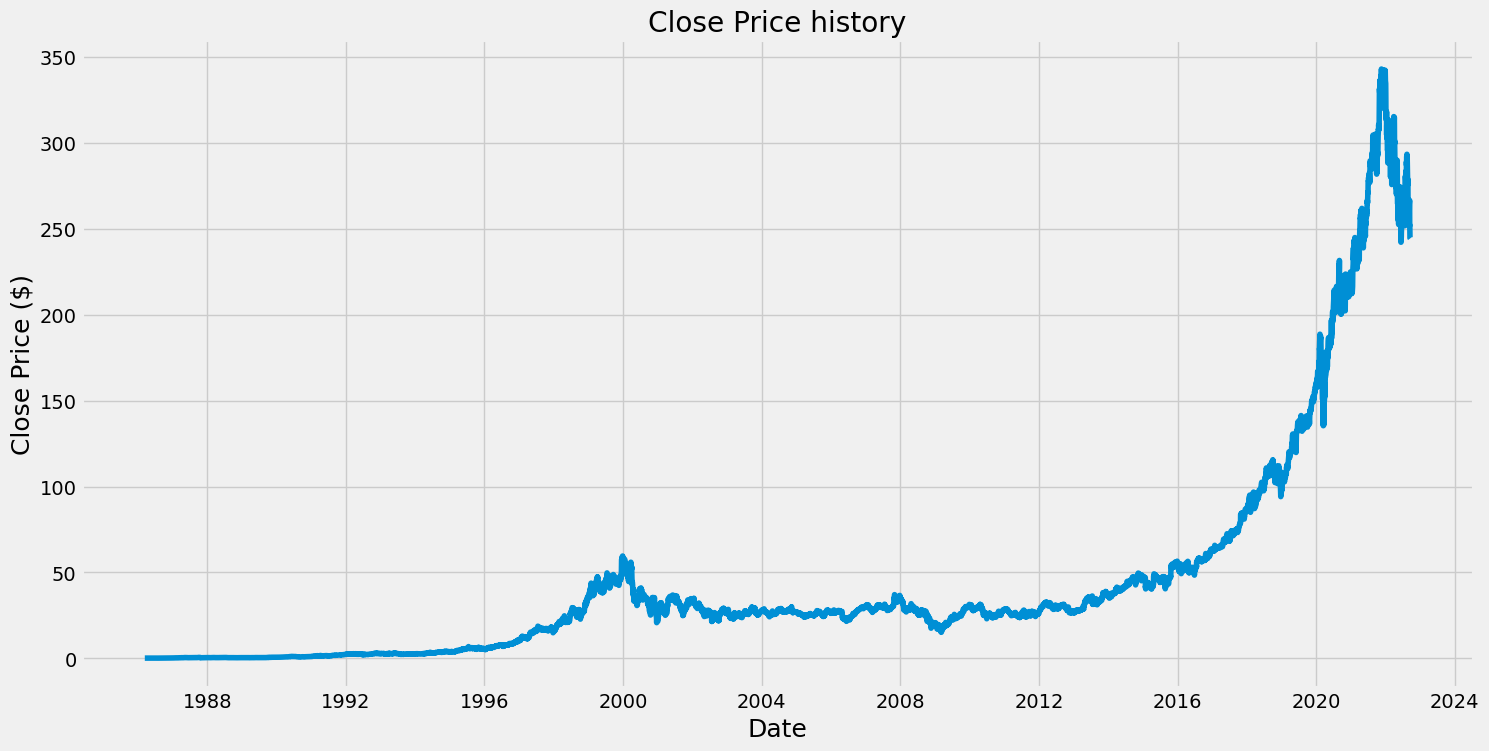

In [4]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with close column
data = df.filter(['Close'])
#convert dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

7364

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[3.03656023e-05],
       [3.54294513e-05],
       [2.78351354e-05],
       ...,
       [7.15089314e-01],
       [7.13223532e-01],
       [7.12582167e-01]])

In [7]:
#Create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([3.03656023e-05, 3.54294513e-05, 2.78351354e-05, 2.27742017e-05,
       1.51828011e-05, 7.59140057e-06, 0.00000000e+00, 5.06093371e-06,
       1.26523343e-05, 1.77132680e-05, 1.51828011e-05, 1.26523343e-05,
       1.51828011e-05, 1.77132680e-05, 1.77132680e-05, 1.26523343e-05,
       1.51828011e-05, 2.02437349e-05, 2.27742017e-05, 2.78351354e-05,
       3.03656023e-05, 3.03656023e-05, 4.04903850e-05, 4.30208519e-05,
       3.28989844e-05, 3.28989844e-05, 2.78351354e-05, 2.91003689e-05,
       5.82036530e-05, 7.84503031e-05, 8.09807700e-05, 7.08559873e-05,
       6.32645867e-05, 5.82036530e-05, 5.82036530e-05, 5.56731861e-05,
       5.82036530e-05, 5.82036530e-05, 6.07341199e-05, 5.82036530e-05,
       6.07341199e-05, 6.32645867e-05, 6.07341199e-05, 6.07341199e-05,
       6.32645867e-05, 5.82036530e-05, 5.56731861e-05, 5.06122524e-05,
       5.06122524e-05, 5.06122524e-05, 6.07341199e-05, 7.08559873e-05,
       7.84503031e-05, 9.11026374e-05, 8.09807700e-05, 8.09807700e-05,
     

In [9]:
#Convert x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7304, 60, 1)

## Build the LSTM model

In [11]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

7304/7304 [==============================] - 793s 104ms/step - loss: 2.9818e-05


In [14]:
#Create the  test dataset
#create a new array containing scaled values
test_data=scaled_data[training_data_len-60:,:]
#create x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#Convert data into numpy array
x_test=np.array(x_test)

In [16]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#Getting the model's predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

58/58 [==============================] - 14s 87ms/step


In [18]:
#Get root mean_squared_error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.755832155811078

c:\Users\sa\anaconda3\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


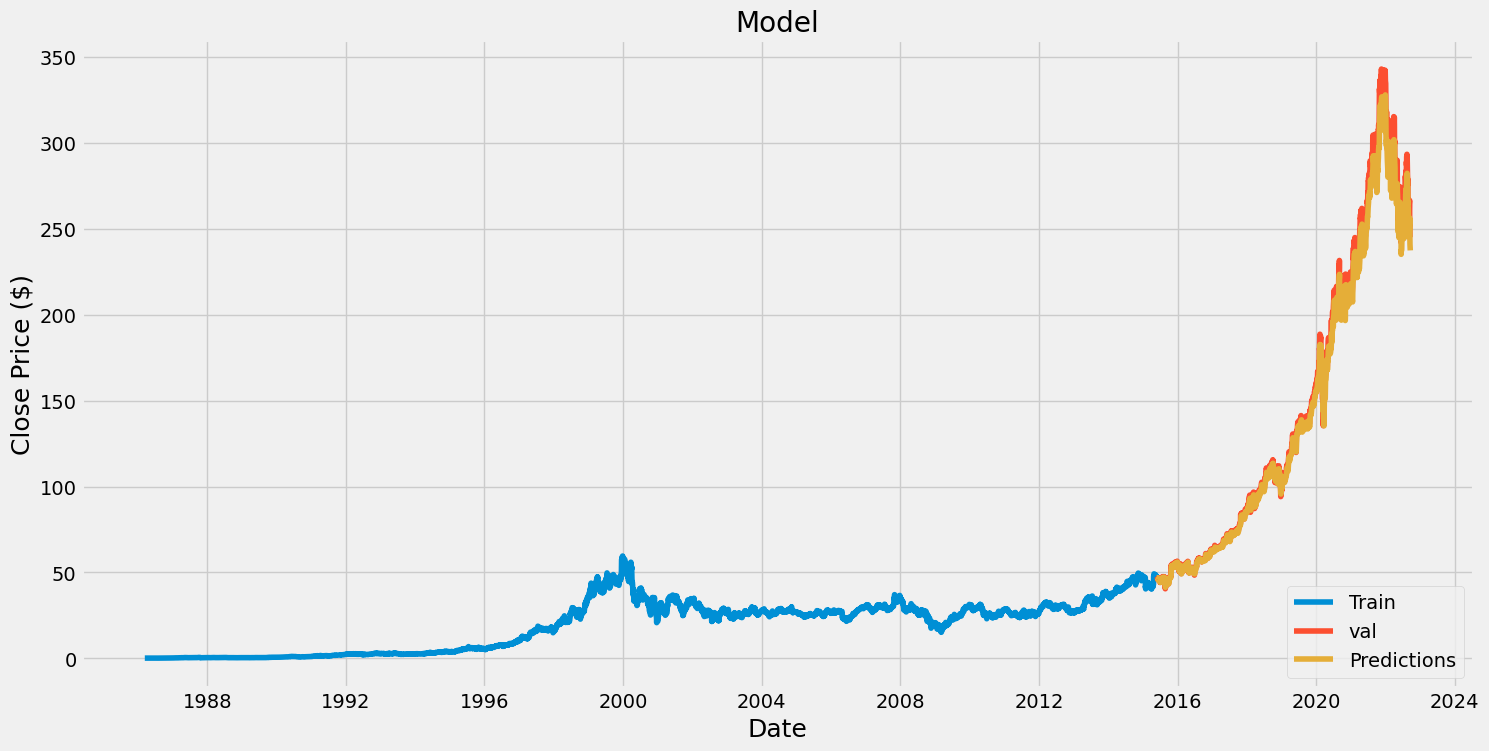

In [19]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc='lower right')
plt.show()